# Football Match Outcome Prediction - Project
# Milestone 4: Model Training

In [9]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

MY_PATH = '/home/arman/Documents/AiCore/projects/football' # add your own path here


We finally have a cleaned dataset with extra features that may be useful. Now it is time to train a model using this dataset which will attempt to predict match results.

## 4.1 Get Baseline Score

Firstly, we need to get a baseline score from a simple model.

Let's read in the cleaned and feature engineered dataset:

### 4.1.1 Read in dataset

In [96]:
match_dataset = pd.read_csv(f"{MY_PATH}/Football-Outcome-Predictions/datasets/cleaned_football_datasets/final_dataset_no_merge.csv")

match_dataset.drop(["Unnamed: 0"], axis=1, inplace=True)
match_dataset

,Home_Team,Away_Team,Result,Link,Season,Round,League,Number_teams,Total_rounds,Home_Goals,...,Draws_When_Away,Losses_When_Away,Points_Home,Points_Away,Position_Home,Position_Away,Total_Goals_For_Home_Team,Total_Goals_Against_Home_Team,Total_Goals_For_Away_Team,Total_Goals_Against_Away_Team
0,Cannes,Montpellier,2-1,https://www.besoccer.com/match/as-cannes/montp...,1991,1,ligue_1,20,38,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PSG,Nancy,2-1,https://www.besoccer.com/match/paris-saint-ger...,1991,1,ligue_1,20,38,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Olympique Marseille,Nice,1-0,https://www.besoccer.com/match/olympique-marse...,1991,1,ligue_1,20,38,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Metz,Lille,2-2,https://www.besoccer.com/match/metz/lillestrom...,1991,1,ligue_1,20,38,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Sochaux,Stade Brestois,1-1,https://www.besoccer.com/match/sochaux/stade-b...,1991,1,ligue_1,20,38,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131688,Erzgebirge Aue,FC St. Pauli,1-3,https://www.besoccer.com/match/fc-erzgebirge-a...,2021,28,2_liga,18,28,1,...,5.0,4.0,37.0,38.0,9.0,8.0,36.0,37.0,41.0,43.0
131689,Paderborn,VfL Bochum,3-0,https://www.besoccer.com/match/paderborn/bochu...,2021,28,2_liga,18,28,3,...,1.0,4.0,35.0,54.0,12.0,1.0,35.0,34.0,50.0,27.0
131690,Hannover 96,Heidenheim,1-3,https://www.besoccer.com/match/hannover-96/hei...,2021,28,2_liga,18,28,1,...,3.0,7.0,36.0,42.0,10.0,6.0,40.0,33.0,38.0,35.0
131691,VfL Osnabrück,Braunschweig,0-4,https://www.besoccer.com/match/vfl-osnabruck/e...,2021,28,2_liga,18,28,0,...,5.0,8.0,26.0,26.0,15.0,16.0,25.0,40.0,23.0,46.0


In [97]:
match_dataset.isnull().sum().sort_values(ascending=False) 

Elo_away                         9743
Elo_home                         9743
Home_Team                           0
Total_Loss_Home_Team                0
Total_Draws_Away_Team               0
Total_Loss_Away_Team                0
Wins_When_Home                      0
Draws_When_Home                     0
Losses_When_Home                    0
Wins_When_Away                      0
Draws_When_Away                     0
Losses_When_Away                    0
Points_Home                         0
Points_Away                         0
Position_Home                       0
Position_Away                       0
Total_Goals_For_Home_Team           0
Total_Goals_Against_Home_Team       0
Total_Goals_For_Away_Team           0
Total_Wins_Away_Team                0
Total_Draws_Home_Team               0
Away_Team                           0
Total_rounds                        0
Result                              0
Link                                0
Season                              0
Round       

There quite a few records which have null elo values. These were not dropped during the feature engineering stage as the created features required these records to have accurate values. But now as we have all the features we need, we can drop all records with null elo's.

In [98]:
match_dataset.dropna(inplace=True)

### 4.1.2 Explore dataset (Correlation Matrix)

Text(0.5, 1.0, 'Football Features Heatmap')

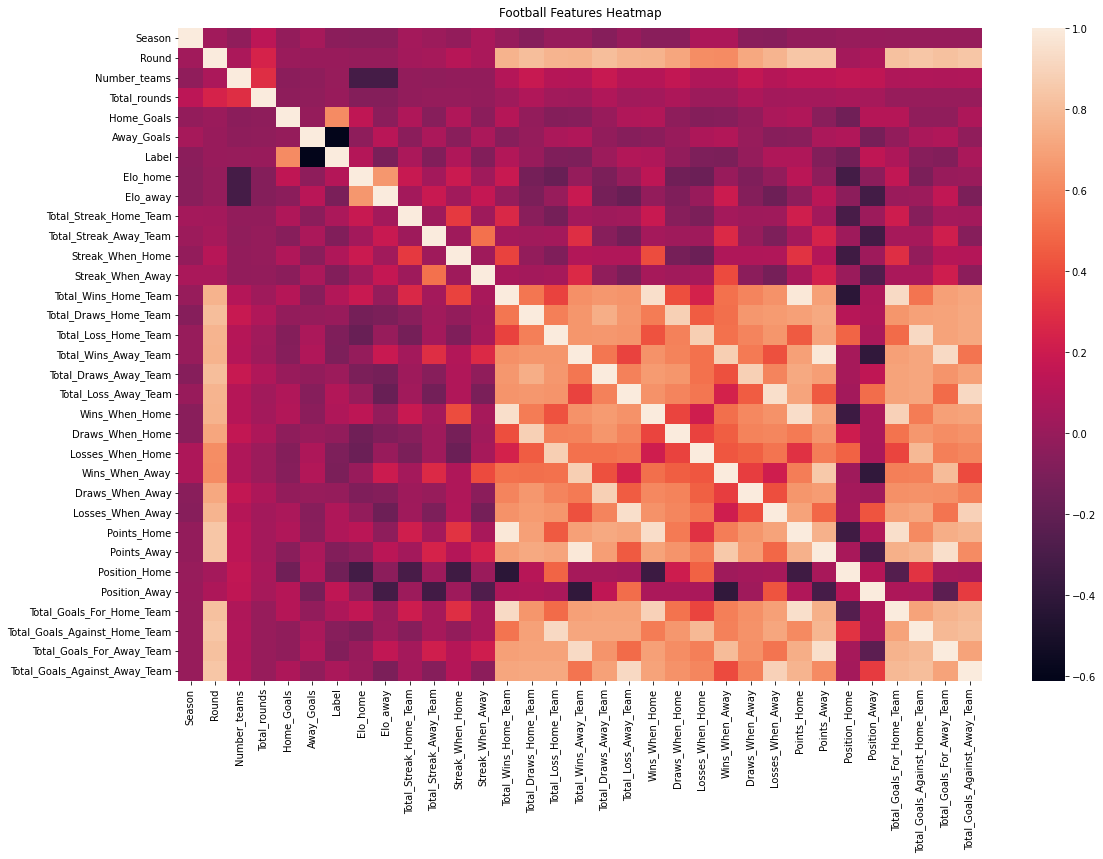

In [99]:
plt.figure(figsize=(18, 12))
corrM = match_dataset.corr()
heatmap = sns.heatmap(corrM)
heatmap.set_title('Football Features Heatmap', fontdict={'fontsize':12}, pad=12)

### 4.1.3 Split dataset into Training and Test data

In [104]:
from sklearn.model_selection import train_test_split

# For X, we need to drop Label, Home Goals and Away Goals, as we will not have access to these values during a match 
X = match_dataset.drop(["Label", "Home_Goals", "Away_Goals"], axis=1)
y = match_dataset["Label"] # target values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [114]:
X_train.iloc[:, 7:]

,Number_teams,Total_rounds,Elo_home,Elo_away,Total_Streak_Home_Team,Total_Streak_Away_Team,Streak_When_Home,Streak_When_Away,Total_Wins_Home_Team,Total_Draws_Home_Team,...,Draws_When_Away,Losses_When_Away,Points_Home,Points_Away,Position_Home,Position_Away,Total_Goals_For_Home_Team,Total_Goals_Against_Home_Team,Total_Goals_For_Away_Team,Total_Goals_Against_Away_Team
2519,20,38,69.0,83.0,0.0,0.0,1.0,0.0,4.0,8.0,...,6.0,3.0,20.0,35.0,18.0,8.0,18.0,28.0,28.0,17.0
130454,18,34,51.0,59.0,0.0,1.0,0.0,0.0,9.0,8.0,...,5.0,5.0,35.0,36.0,7.0,6.0,36.0,27.0,27.0,32.0
5584,20,38,87.0,66.0,2.0,0.0,1.0,0.0,11.0,6.0,...,3.0,8.0,39.0,26.0,7.0,17.0,27.0,20.0,22.0,31.0
94636,24,46,63.0,61.0,0.0,0.0,1.0,0.0,7.0,6.0,...,4.0,3.0,27.0,29.0,9.0,6.0,16.0,15.0,28.0,18.0
106271,18,34,76.0,66.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,4.0,3.0,9.0,16.0,4.0,8.0,4.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91909,20,38,59.0,52.0,0.0,0.0,0.0,0.0,2.0,7.0,...,3.0,3.0,13.0,20.0,20.0,11.0,12.0,15.0,13.0,11.0
66037,18,34,68.0,71.0,0.0,0.0,1.0,0.0,5.0,6.0,...,6.0,7.0,21.0,30.0,17.0,12.0,20.0,44.0,16.0,24.0
77043,20,38,54.0,63.0,0.0,0.0,0.0,0.0,2.0,5.0,...,0.0,1.0,11.0,19.0,10.0,1.0,5.0,4.0,12.0,4.0
82102,22,42,55.0,58.0,0.0,1.0,0.0,0.0,9.0,6.0,...,5.0,6.0,33.0,37.0,15.0,11.0,27.0,29.0,26.0,25.0


### 4.1.4 Train Logistic Regression Model

We are using Logistic Regression to fit the model and obtain a baseline score.

In [112]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train.iloc[:, 7:], y_train) # using X_train.iloc[:, 7:] as first 7 features are unneeded and not in integer/float format

/home/arman/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [113]:
model.score(X_test.iloc[:, 7:], y_test)

0.4930709307093071

Logistic Regression gives us a baseline accuracy score of ~50%. This is okay but can be better. There are a variety of different things we can do to improve this score.

## 4.2 Feature Selection

A way we can improve our score is by using Feature Selection.

Feature Selection is the process of reducing the number of features in our dataset during training to improve the performance of the model. 

In [144]:
X_train.iloc[:, 7:].columns

Index(['Number_teams', 'Total_rounds', 'Elo_home', 'Elo_away',
       'Total_Streak_Home_Team', 'Total_Streak_Away_Team', 'Streak_When_Home',
       'Streak_When_Away', 'Total_Wins_Home_Team', 'Total_Draws_Home_Team',
       'Total_Loss_Home_Team', 'Total_Wins_Away_Team', 'Total_Draws_Away_Team',
       'Total_Loss_Away_Team', 'Wins_When_Home', 'Draws_When_Home',
       'Losses_When_Home', 'Wins_When_Away', 'Draws_When_Away',
       'Losses_When_Away', 'Points_Home', 'Points_Away', 'Position_Home',
       'Position_Away', 'Total_Goals_For_Home_Team',
       'Total_Goals_Against_Home_Team', 'Total_Goals_For_Away_Team',
       'Total_Goals_Against_Away_Team'],
      dtype='object')

In [142]:
len(X_train.iloc[:, 7:].columns)

28

In [139]:
model.coef_[0] # -1
model.coef_[1] # 0
model.coef_[2] # 1

array([ 0.00460001,  0.00056527,  0.02197172, -0.01916025,  0.01223139,
       -0.00847378,  0.01554471, -0.00355069, -0.00125185, -0.00168415,
       -0.00160911,  0.00223825, -0.00107472, -0.00557137,  0.00251392,
        0.00043798, -0.00912235, -0.00900301, -0.0023577 ,  0.003371  ,
       -0.0054397 ,  0.00564002, -0.00432457,  0.00854281,  0.01306223,
       -0.00992207, -0.0130878 ,  0.01349627])

In [155]:
wins = {}
draws = {}
loss = {}

for i in range(len(X_train.iloc[:, 7:].columns)):
    loss[X_train.iloc[:, 7:].columns[i]] = model.coef_[0][i]

for i in range(len(X_train.iloc[:, 7:].columns)):
    draws[X_train.iloc[:, 7:].columns[i]] = model.coef_[1][i]

for i in range(len(X_train.iloc[:, 7:].columns)):
    wins[X_train.iloc[:, 7:].columns[i]] = model.coef_[2][i]

loss

{'Number_teams': -0.008012050455323803,
 'Total_rounds': -0.0027546292737227387,
 'Elo_home': -0.019898513682867523,
 'Elo_away': 0.020321331536273374,
 'Total_Streak_Home_Team': -0.011694219626348715,
 'Total_Streak_Away_Team': 0.010479508150655308,
 'Streak_When_Home': -0.010752342007866646,
 'Streak_When_Away': 0.006284454715015947,
 'Total_Wins_Home_Team': 0.001692061945997757,
 'Total_Draws_Home_Team': -0.0027274883261482587,
 'Total_Loss_Home_Team': 0.0015613139781498247,
 'Total_Wins_Away_Team': -0.0014173402465186586,
 'Total_Draws_Away_Team': -0.003927043824053212,
 'Total_Loss_Away_Team': 0.005878160101532255,
 'Wins_When_Home': -0.010347624543400885,
 'Draws_When_Home': -0.0035332032412974004,
 'Losses_When_Home': 0.015399234292361053,
 'Wins_When_Away': 0.016466049885868913,
 'Draws_When_Away': -8.531035566697899e-05,
 'Losses_When_Away': -0.01179337014747893,
 'Points_Home': 0.0023486975118443294,
 'Points_Away': -0.008179064563609055,
 'Position_Home': 0.00302101598362860

In [51]:
from sklearn.metrics import confusion_matrix

y_true = list(y_test)
y_pred = list(model.predict(X_test.iloc[:, 7:]))

cf_matrix = confusion_matrix(y_true, y_pred)
cf_matrix

array([[ 651,   40,    0],
       [  36,  548,   35],
       [   0,   26, 1144]])

<AxesSubplot:>

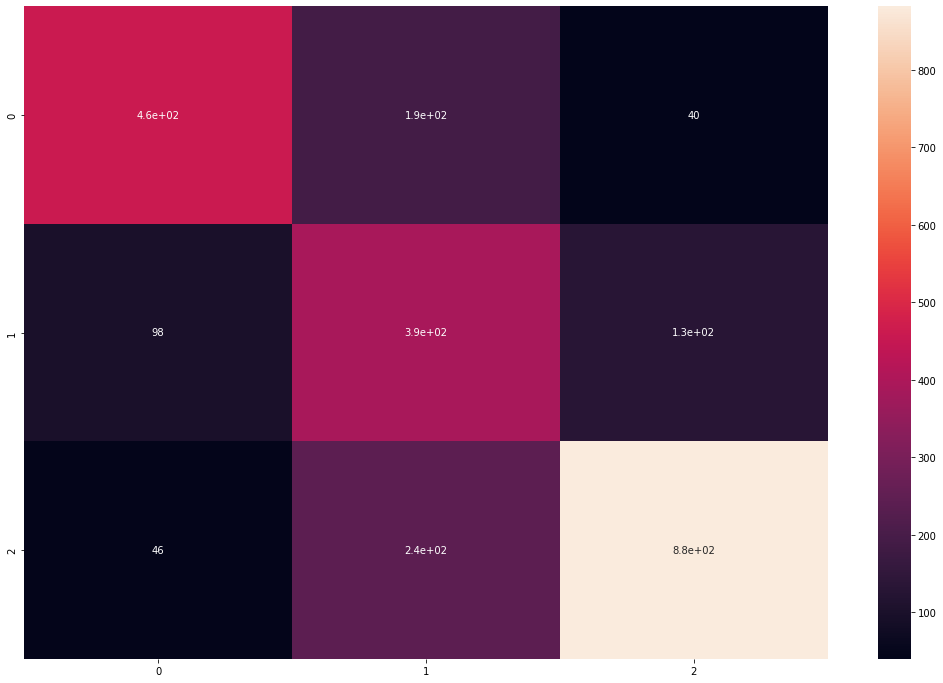

In [59]:
plt.figure(figsize=(18, 12))
sns.heatmap(cf_matrix, annot=True)

# NAIVE BAYES

In [84]:
# Create Gaussian Naive Bayes model object
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train.iloc[:, 7:], y_train)

GaussianNB()

In [85]:
model.score(X_test.iloc[:, 7:], y_test)

0.4364083640836408

In [70]:
y_test[:10]

42846   -1
38046    1
34070    0
32793    1
39659    1
32625    1
36073    1
42005   -1
39281    1
41052   -1
Name: Label, dtype: int64

In [56]:
model.predict(X_test.iloc[:, 7:][:10])

array([ 0, -1,  1,  0,  0,  0,  0,  0,  0,  1])

In [57]:
model.predict_proba(X_test.iloc[:, 7:][:10])

array([[2.32358234e-01, 7.19043414e-01, 4.85983528e-02],
       [9.67041783e-01, 3.28875607e-02, 7.06564807e-05],
       [5.19960460e-11, 1.07748659e-05, 9.99989225e-01],
       [3.09584892e-01, 5.75357658e-01, 1.15057449e-01],
       [5.56133422e-02, 6.13255746e-01, 3.31130911e-01],
       [2.30347338e-01, 6.75497019e-01, 9.41556432e-02],
       [1.54789790e-01, 6.88481057e-01, 1.56729153e-01],
       [1.90976814e-01, 6.73971506e-01, 1.35051680e-01],
       [3.29770050e-01, 6.06066109e-01, 6.41638409e-02],
       [3.12560554e-02, 3.77574510e-01, 5.91169435e-01]])

<AxesSubplot:>

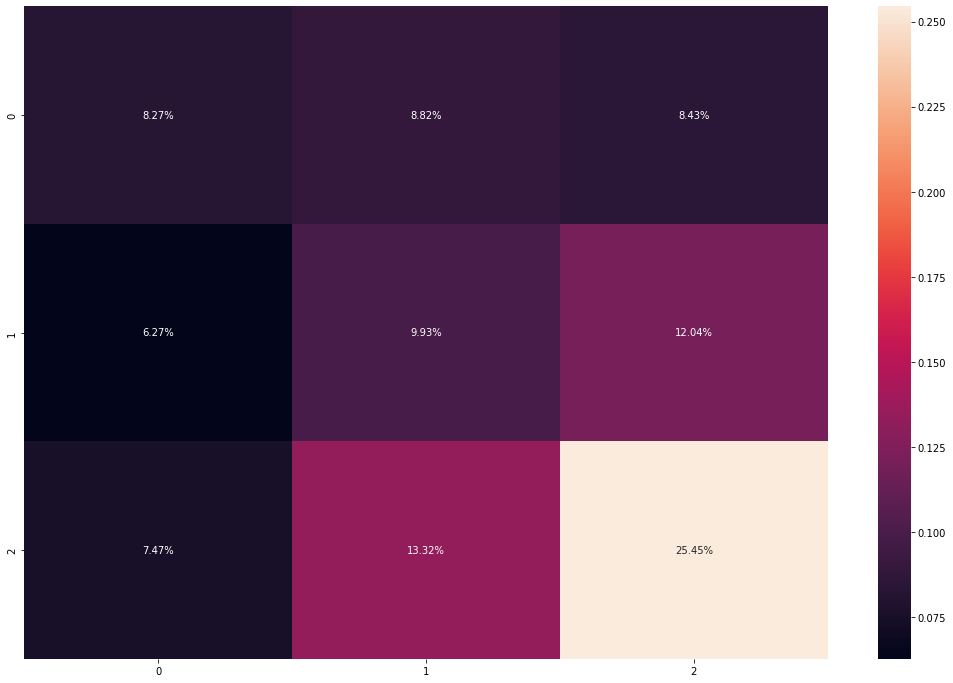

In [86]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_true = list(y_test)
y_pred = list(model.predict(X_test.iloc[:, 7:]))

cf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(18, 12))
#sns.heatmap(cf_matrix, annot=True)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')

In [87]:
new = {}


for features in range(7, 29): 
    model.fit(X_train.iloc[:, features:], y_train)
    new[features] = model.score(X_test.iloc[:, features:], y_test)

new

{7: 0.4364083640836408,
 8: 0.4355063550635506,
 9: 0.43485034850348503,
 10: 0.4312423124231242,
 11: 0.4269372693726937,
 12: 0.44362443624436243,
 13: 0.4351373513735137,
 14: 0.44965149651496517,
 15: 0.44649446494464945,
 16: 0.45510455104551045,
 17: 0.45506355063550635,
 18: 0.45662156621566213,
 19: 0.45469454694546946,
 20: 0.45477654776547766,
 21: 0.46043460434604344,
 22: 0.4652726527265273,
 23: 0.4652316523165232,
 24: 0.46687166871668717,
 25: 0.46826568265682655,
 26: 0.46773267732677326,
 27: 0.46896268962689625,
 28: 0.47129971299712997}